# Geospatial Sao Paulo Crime Database

Link to Kaggle: https://www.kaggle.com/datasets/danlessa/geospatial-sao-paulo-crime-database

In [ ]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import pandas as pd

# File path of the dataset
file_path = "/content/dataset-limpo.csv"  # Standard Colab path for uploaded files

# Load the dataset
df = pd.read_csv(file_path)

# Display column names and check the index of "descricao"
print("Column overview:")
print(df.columns)

# Determine the position of the "descricao" column
descricao_index = df.columns.get_loc("descricao")
print(f"\nIndex of the 'descricao' column: {descricao_index}")

# Create a new column 'description' (initially empty, as it will be filled later)
df["description"] = ""

# Display the first 5 rows of the dataset
print("\nFirst rows of the dataset:")
print(df.head())


Spaltenübersicht:
Index(['id', 'bairro', 'created_at', 'descricao', 'endereco', 'id.1',
       'ip_address_origin', 'latitude', 'longitude', 'registrou_bo', 'sexo',
       'tipo_assalto_id', 'titulo', 'uri', 'user_id', 'valor_prejuizo',
       'Bicicleta', 'Bolsa ou Mochila', 'Carteira', 'Cartão de Crédito',
       'Celular', 'Computador', 'DVD', 'Dinheiro', 'Documentos',
       'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis', 'Notebook',
       'Outros', 'Relógio', 'Som', 'Tablet', 'Tv', 'time'],
      dtype='object')

Index der Spalte 'descricao': 3

Erste Zeilen des Datensatzes:
      id             bairro               created_at  \
0  49787            Butantã  2015-06-16 23:34:01.000   
1  10679           Itaquera  2013-09-11 18:26:31.819   
2  10682           Itaquera  2013-09-11 18:42:07.858   
3   6166            Morumbi  2013-08-20 11:56:52.717   
4   6521  Alto de Pinheiros  2013-08-20 17:41:21.569   

                                           descricao  \
0  5 bandi

In [ ]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import math

# Load the dataset
file_path = "/content/dataset-limpo.csv"
df = pd.read_csv(file_path)

# Load the translation model
model_name = "Helsinki-NLP/opus-mt-es-en"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Function for batch translation
def translate_batch(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    translated = model.generate(**inputs, max_length=512, num_beams=4, early_stopping=True)
    return [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

# Batch processing
batch_size = 500  # Size of the batches
num_batches = math.ceil(len(df) / batch_size)

translated_descriptions = []

for i in range(num_batches):
    print(f"Translating batch {i+1} of {num_batches}...")
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(df))
    batch_texts = df['descricao'][start_idx:end_idx].fillna("").tolist()  # Replace NaN values with empty strings
    translated_batch = translate_batch(batch_texts)
    translated_descriptions.extend(translated_batch)

# Add a new column with the translated descriptions
df['description'] = translated_descriptions

# Save the translated dataset
output_path = "/content/translated_dataset.csv"
df.to_csv(output_path, index=False)

print(f"Translation completed. Dataset saved at: {output_path}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Übersetze Batch 1 von 26...


In [ ]:
# Install necessary libraries
!pip install folium

# Import necessary libraries
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset (adjust path if needed)
file_path = "/content/dataset-limpo.csv"  # Adjust filename if different
df = pd.read_csv(file_path)

# Filter rows with valid latitude and longitude values
df = df.dropna(subset=["latitude", "longitude"])

# Convert latitude and longitude to numeric values (if needed)
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

# Remove rows with invalid latitude/longitude values
df = df.dropna(subset=["latitude", "longitude"])

# Create a base map centered on São Paulo (approximate coordinates)
map_center = [-23.5505, -46.6333]  # Latitude and longitude of São Paulo
m = folium.Map(location=map_center, zoom_start=12)

# Prepare the data for the heatmap (as a list of [Latitude, Longitude])
heat_data = df[["latitude", "longitude"]].values.tolist()

# Add the heatmap to the map
HeatMap(heat_data, radius=10, blur=15, max_zoom=13).add_to(m)

# Save the map as an HTML file
map_output_path = "/content/hotspot_map.html"
m.save(map_output_path)

# Display the path to the map
print(f"The hotspot map has been created and saved at the following path: {map_output_path}")

from google.colab import files

# Download the map
files.download("/content/hotspot_map.html")


Die Hotspot-Karte wurde erstellt und unter folgendem Pfad gespeichert: /content/hotspot_map.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install necessary libraries
!pip install folium

# Import necessary libraries
import pandas as pd
import folium
from folium.plugins import HeatMap
import requests

# Load the dataset with crime data
file_path = "/content/dataset-limpo.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Filter rows with valid latitude and longitude values
df = df.dropna(subset=["latitude", "longitude"])
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
df = df.dropna(subset=["latitude", "longitude"])

# Load GeoJSON data for São Paulo's subprefectures
geojson_url = "https://raw.githubusercontent.com/codigourbano/subprefeituras-sp/master/data/subprefeituras-sp.geojson"
response = requests.get(geojson_url)
geojson_data = response.json()

# Group the data by district (if available in the "bairro" column)
# If mapping is missing, latitude/longitude can be used for subprefecture mapping
top_bairros = df["bairro"].value_counts().head(5)

# Create the summary
summary_html = "<h4>Top 5 Most Dangerous Districts:</h4><ul>"
for bairro, count in top_bairros.items():
    summary_html += f"<li><strong>{bairro}</strong>: {count} incidents</li>"
summary_html += "</ul>"

# Create a base map centered on São Paulo
map_center = [-23.5505, -46.6333]  # São Paulo coordinates
m = folium.Map(location=map_center, zoom_start=12)

# Add subprefecture boundaries to the map
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'fillColor': 'none',      # No fill color
        'color': 'red',           # Border color
        'weight': 2,              # Border thickness
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['name'],          # Field name for the tooltip
        aliases=['Subprefecture'] # Alias for the tooltip
    )
).add_to(m)

# Prepare the data for the heatmap (latitude and longitude)
heat_data = df[["latitude", "longitude"]].values.tolist()

# Add the heatmap to the map
HeatMap(heat_data, radius=10, blur=15, max_zoom=13).add_to(m)

# Add the summary window to the map
folium.Marker(
    location=map_center,
    icon=folium.DivIcon(html=f'<div style="font-size: 12px; background: white; padding: 5px; border-radius: 5px;">{summary_html}</div>')
).add_to(m)

# Save the combined map as an HTML file
map_output_path = "/content/sao_paulo_combined_with_summary.html"
m.save(map_output_path)

# Download the combined map
from google.colab import files
files.download(map_output_path)

print(f"The combined map with summary has been created and saved: {map_output_path}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Die kombinierte Karte mit Summary wurde erstellt und gespeichert: /content/sao_paulo_combined_with_summary.html


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/dataset-limpo.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Find the earliest and latest dates
earliest_date = df['created_at'].min()
latest_date = df['created_at'].max()

# Output the results
print(f"The first recorded incident occurred on: {earliest_date}")
print(f"The last recorded incident occurred on: {latest_date}")


Der erste aufgezeichnete Vorfall war am: 2013-07-06 22:49:11.434000
Der letzte aufgezeichnete Vorfall war am: 2018-03-21 05:26:40.076000


In [ ]:
!pip install folium

import pandas as pd
import folium
from folium.plugins import TimestampedGeoJson

# Load the dataset
file_path = "/content/dataset-limpo.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Convert 'created_at' to datetime format and filter valid values
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df = df.dropna(subset=['latitude', 'longitude', 'created_at'])

# Format the 'created_at' column in ISO 8601 (required for TimestampedGeoJson)
df['created_at_iso'] = df['created_at'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')

# Create GeoJSON data for the time-lapse map
features = []
for _, row in df.iterrows():
    features.append({
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['longitude'], row['latitude']],
        },
        'properties': {
            'time': row['created_at_iso'],
            'popup': f"Bairro: {row['bairro']}<br>Description: {row['descricao']}",
        },
    })

geojson_data = {
    'type': 'FeatureCollection',
    'features': features,
}

# Create the base map
map_center = [-23.5505, -46.6333]  # São Paulo coordinates
m = folium.Map(location=map_center, zoom_start=12)

# Add the time-lapse layer
TimestampedGeoJson(
    geojson_data,
    transition_time=200,  # Time between frames in milliseconds
    loop=True,            # Repeat endlessly
    auto_play=True,       # Start automatically
    add_last_point=True,  # Keep the last point visible
).add_to(m)

# Save the dynamic map as an HTML file
map_output_path = "/content/sao_paulo_time_lapse_map.html"
m.save(map_output_path)

# Download the map
from google.colab import files
files.download(map_output_path)

print(f"The dynamic map has been created and saved: {map_output_path}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Die dynamische Karte wurde erstellt und gespeichert: /content/sao_paulo_time_lapse_map.html


In [ ]:
# Install necessary libraries
!pip install folium sklearn

# Import necessary libraries
import pandas as pd
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
import requests

# Load the dataset with crime data
file_path = "/content/dataset-limpo.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

# Filter rows with valid latitude and longitude values
df = df.dropna(subset=["latitude", "longitude"])
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
df = df.dropna(subset=["latitude", "longitude"])

# Load the GeoJSON data for São Paulo's subprefectures
geojson_url = "https://raw.githubusercontent.com/codigourbano/subprefeituras-sp/master/data/subprefeituras-sp.geojson"
response = requests.get(geojson_url)
geojson_data = response.json()

# Create a base map centered on São Paulo
map_center = [-23.5505, -46.6333]  # São Paulo coordinates
m = folium.Map(location=map_center, zoom_start=12)

# Add the subprefecture boundaries to the map
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'fillColor': 'none',      # No fill color
        'color': 'red',           # Border color
        'weight': 2,              # Border thickness
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['name'],          # Field name for the tooltip
        aliases=['Subprefecture'] # Alias for the tooltip
    )
).add_to(m)

# ----------------
# **Extension 1: Clustering with K-Means**
# ----------------

# Select latitude and longitude for clustering
coords = df[["latitude", "longitude"]]

# Apply K-Means clustering (choose the number of clusters, e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df["cluster"] = kmeans.fit_predict(coords)

# Add clusters to the map
colors = ["blue", "green", "orange", "purple", "darkred"]  # Cluster colors
for cluster_id in df["cluster"].unique():
    cluster_data = df[df["cluster"] == cluster_id]
    for _, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=[row["latitude"], row["longitude"]],
            radius=3,
            color=colors[cluster_id],
            fill=True,
            fill_opacity=0.6,
            tooltip=f"Cluster: {cluster_id}"
        ).add_to(m)

# ----------------
# **Extension 2: Marker Clustering**
# ----------------
marker_cluster = MarkerCluster()
for _, row in df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"Location: ({row['latitude']}, {row['longitude']})"
    ).add_to(marker_cluster)
marker_cluster.add_to(m)

# ----------------
# **Extension 3: Integration of Socioeconomic Factors**
# ----------------

# Example: Integration of an additional socioeconomic factor (e.g., income)
# You can add data to the subprefecture (GeoJSON or CSV).
# Here's an example of dummy data:
socioeconomic_data = {
    "name": ["Subprefecture A", "Subprefecture B", "Subprefecture C"],
    "income_level": [5000, 3000, 7000]  # Average income
}

# Convert the dummy data into a DataFrame
socio_df = pd.DataFrame(socioeconomic_data)

# Merge GeoJSON with socioeconomic data
for feature in geojson_data["features"]:
    subpref_name = feature["properties"]["name"]
    income = socio_df[socio_df["name"] == subpref_name]["income_level"]
    if not income.empty:
        feature["properties"]["income_level"] = income.values[0]
    else:
        feature["properties"]["income_level"] = "Unknown"

# Update GeoJSON tooltip with socioeconomic factors
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'fillColor': 'green' if feature["properties"]["income_level"] != "Unknown" else "gray",
        'color': 'red',
        'weight': 2,
        'fillOpacity': 0.5
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'income_level'],
        aliases=['Subprefecture', 'Average Income']
    )
).add_to(m)

# ----------------
# Save the combined map as an HTML file
map_output_path = "/content/sao_paulo_enhanced_map.html"
m.save(map_output_path)

# Download the combined map
from google.colab import files
files.download(map_output_path)

print(f"The enhanced map has been created and saved: {map_output_path}")


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Die erweiterte Karte wurde erstellt und gespeichert: /content/sao_paulo_enhanced_map.html


# Kaggle Competition

Link to Course: https://www.kaggle.com/learn/geospatial-analysis

In [ ]:
####### Using Kaggle API ########

import os
import json

# Set up the Kaggle API
api_key = {
    "username": "leonreiss",
    "key": "abaa7f151373f9f86d88ad48a49795c2"
}
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(api_key, f)
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

# Download specific dataset
dataset_path = "./data/geospatial_learn"
os.makedirs(dataset_path, exist_ok=True)

# Download Kaggle dataset (includes DEC_lands)
os.system(f"kaggle datasets download -d alexisbcook/geospatial-learn-course-data -p {dataset_path}")

# Unzip the downloaded file
os.system(f"unzip {dataset_path}/geospatial-learn-course-data.zip -d {dataset_path}")

print(f"Datasets have been downloaded and extracted to {dataset_path}!")


Datensätze wurden heruntergeladen und in ./data/geospatial_learn entpackt!


Campsites:
   OBJECTID         UNIT                        FACILITY  \
0     91706          CFP            DELAWARE WILD FOREST   
1    108646  SCHUYLER 02         SUGAR HILL STATE FOREST   
2     19933          AFP  MOOSE RIVER PLAINS WILD FOREST   
5     39673          AFP       SARANAC LAKES WILD FOREST   
6     19434          AFP         LAKE GEORGE WILD FOREST   

                                 NAME               ASSET  \
0              ADA PRIMITIVE CAMPSITE  PRIMITIVE CAMPSITE   
1              MAPLE LANE CAMPSITE #3  PRIMITIVE CAMPSITE   
2     MOOSE RIVER PLAINS CAMPSITE 103  PRIMITIVE CAMPSITE   
5  SARANAC ISLANDS CAMPGROUND SITE 27  PRIMITIVE CAMPSITE   
6           GAY POND ROAD CAMPSITE 13  PRIMITIVE CAMPSITE   

                                             DESCRIP  REGION       OFFICE  \
0                                               None       4     STAMFORD   
1                                               None       8         BATH   
2                             

<Axes: >

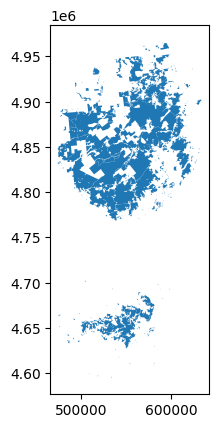

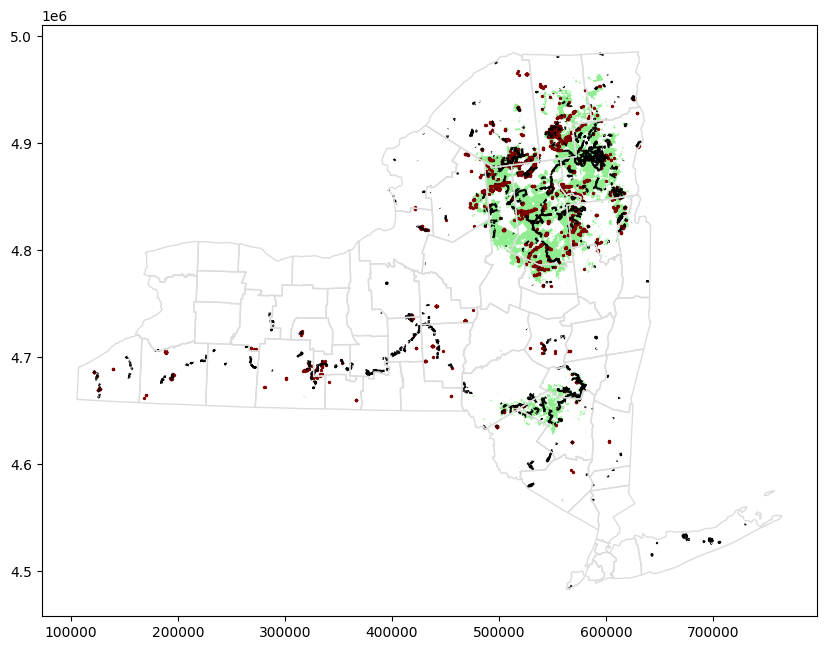

In [ ]:
import geopandas as gpd

# Adjusted path to the specific dataset
data_path = "./data/geospatial_learn/DEC_lands/DEC_lands/DEC_lands.shp"

# Read data
data = gpd.read_file(data_path)

# Display the first five rows of the data
#print(full_data.head())

################ BASIC OPERATIONS USING THE GEOPANDAS DF ####################

#type(data)
#data.CLASS.value_counts()

# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

# Plot the selected lands
wild_lands.plot()

# Explanation: In a GeoDataFrame (a special DataFrame in GeoPandas used for geographical data),
# there is always a special column called “geometry”. This column is the core of a GeoDataFrame
# and contains the geometric objects that describe the spatial data.

wild_lands.geometry.head()
# First print: geometry 0	POLYGON ((486093.245 4635308.586, 486787.235 4...

# While this column can contain a variety of different datatypes, each entry will
# typically be a Point, LineString, or Polygon.

# Campsites in New York state (Point)
POI_data = gpd.read_file("./data/geospatial_learn/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET == 'PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("./data/geospatial_learn/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET == 'FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("./data/geospatial_learn/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

# Optional: Display the first few rows to verify
print("Campsites:")
print(campsites.head())

print("\nTrails:")
print(trails.head())

print("\nCounties:")
print(counties.head())

# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)


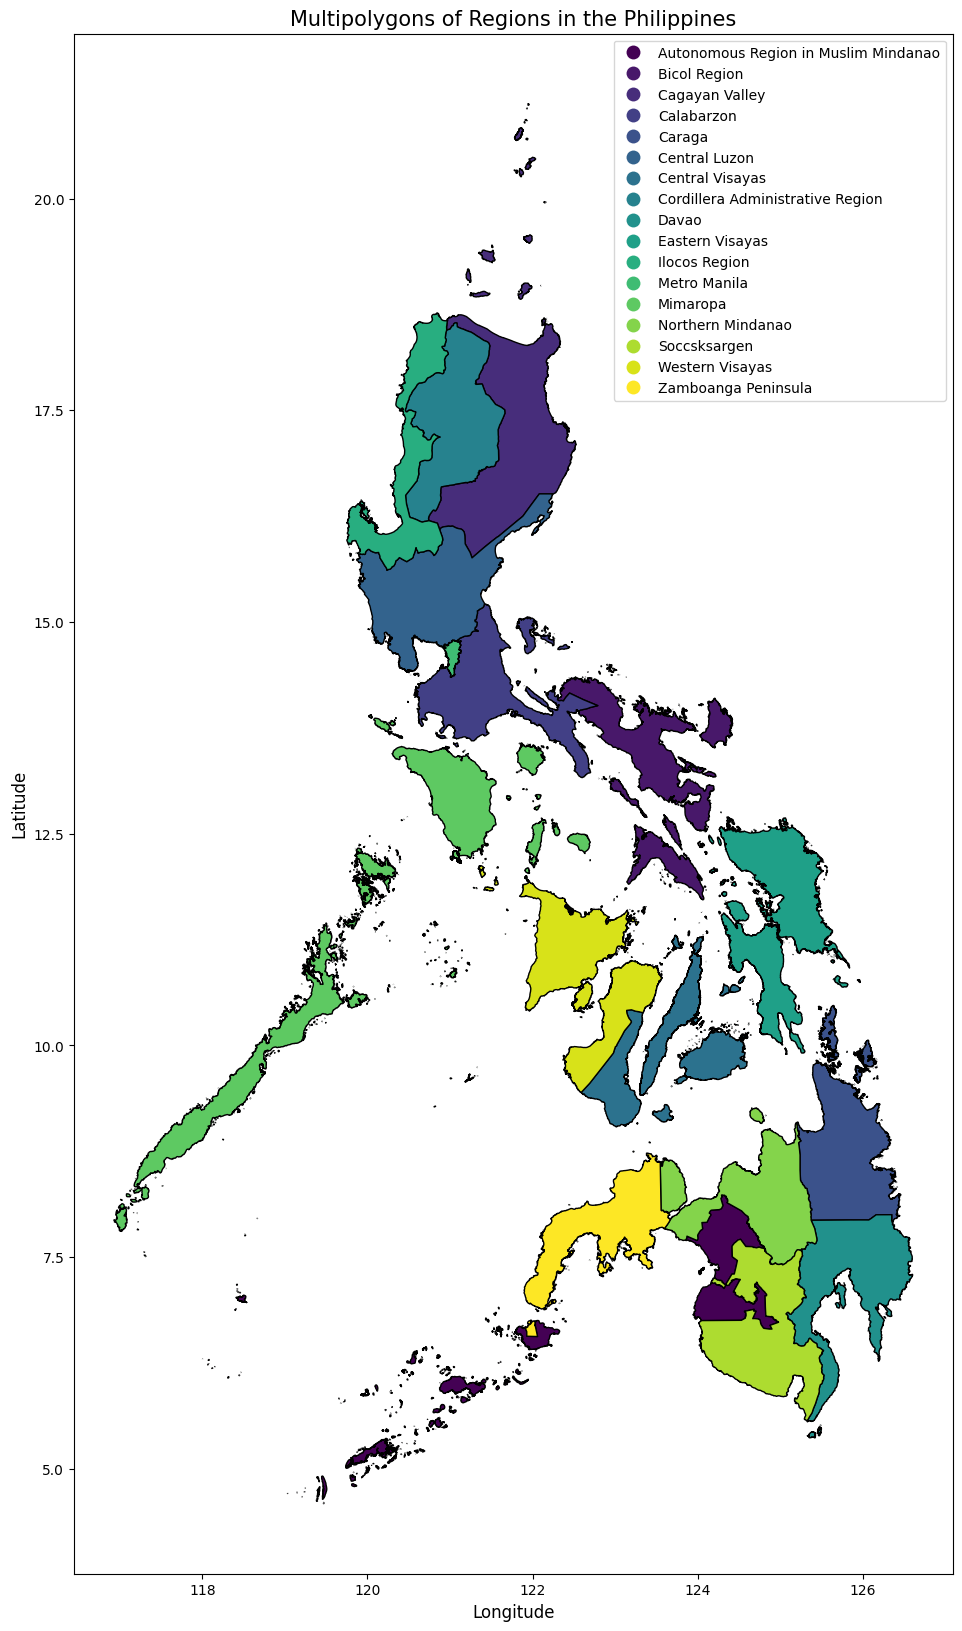

In [ ]:
import geopandas as gpd

# Load and head data
data_path = "/content/data/geospatial_learn/Philippines_AL258.kml"
philippines_data = gpd.read_file(data_path)
#print(philippines_data.head())

import geopandas as gpd
import matplotlib.pyplot as plt

# Visualize multipolygons
philippines_data.plot(
    figsize=10, 10,  # Set the size of the plot
    edgecolor='black',  # Color of polygon borders
    column='Name',  # Use the 'Name' column to differentiate regions by color
    legend=True,  # Display a legend
    cmap='viridis'  # Color map for differentiating regions
)

# Add a title and axis labels
plt.title("Multipolygons of Regions in the Philippines", fontsize=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Show the map
plt.show()

<ipython-input-23-18357723ef20>:9: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  philippines_data['area'] = philippines_data['geometry'].area


                                    Name      area
2                         Cagayan Valley  2.249042
12                              Mimaropa  2.219795
5                          Central Luzon  1.760738
9                        Eastern Visayas  1.727058
15                       Western Visayas  1.661469
4                                 Caraga  1.571741
14                          Soccsksargen  1.556520
7       Cordillera Administrative Region  1.536960
8                                  Davao  1.479155
1                           Bicol Region  1.444544
3                             Calabarzon  1.420723
13                     Northern Mindanao  1.417123
16                   Zamboanga Peninsula  1.194332
6                        Central Visayas  1.170826
10                         Ilocos Region  1.063687
0   Autonomous Region in Muslim Mindanao  0.984418
11                          Metro Manila  0.050190


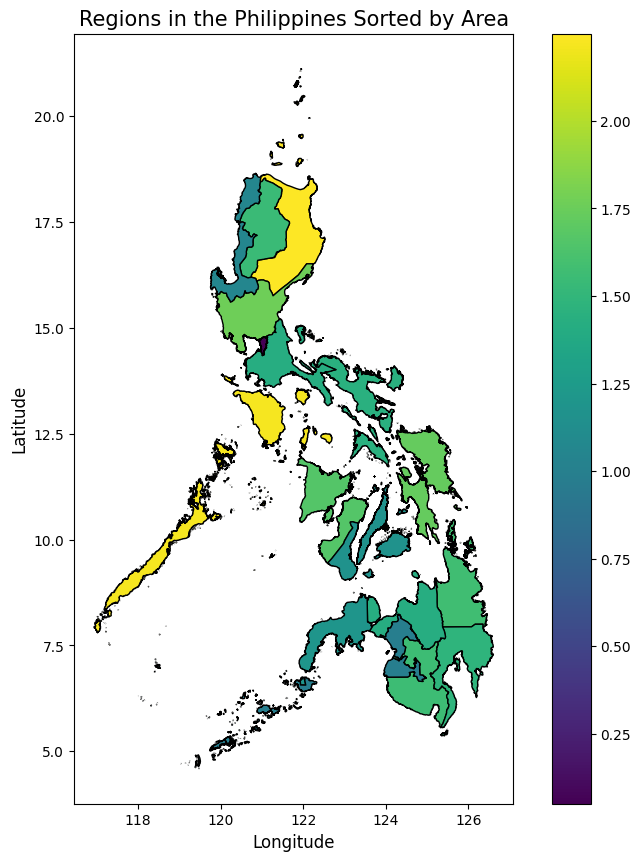

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
data_path = "/content/data/geospatial_learn/Philippines_AL258.kml"
philippines_data = gpd.read_file(data_path)

# Calculate the area of each polygon or multipolygon
philippines_data['area'] = philippines_data['geometry'].area

# Sort the data by area in descending order
sorted_data = philippines_data.sort_values(by='area', ascending=False)

# Display the sorted data
print(sorted_data[['Name', 'area']])

# Visualize the sorted polygons
sorted_data.plot(
    figsize=(10, 10),  # Set the size of the plot
    edgecolor='black',  # Color of polygon borders
    column='area',  # Color based on the area
    legend=True,  # Display a legend
    cmap='viridis'  # Color map for differentiating by area
)

# Add a title and axis labels
plt.title("Regions in the Philippines Sorted by Area", fontsize=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Show the map
plt.show()


Current CRS: EPSG:4326
                                    Name      area_km2
12                              Mimaropa  26863.315722
2                         Cagayan Valley  26465.048732
5                          Central Luzon  20928.408076
9                        Eastern Visayas  20846.101620
15                       Western Visayas  20080.293032
4                                 Caraga  19154.290211
14                          Soccsksargen  19038.598918
8                                  Davao  18096.756108
7       Cordillera Administrative Region  18083.115609
1                           Bicol Region  17305.479234
13                     Northern Mindanao  17271.531056
3                             Calabarzon  16966.133505
16                   Zamboanga Peninsula  14557.093622
6                        Central Visayas  14192.809934
10                         Ilocos Region  12552.312812
0   Autonomous Region in Muslim Mindanao  12029.925546
11                          Metro Manila  

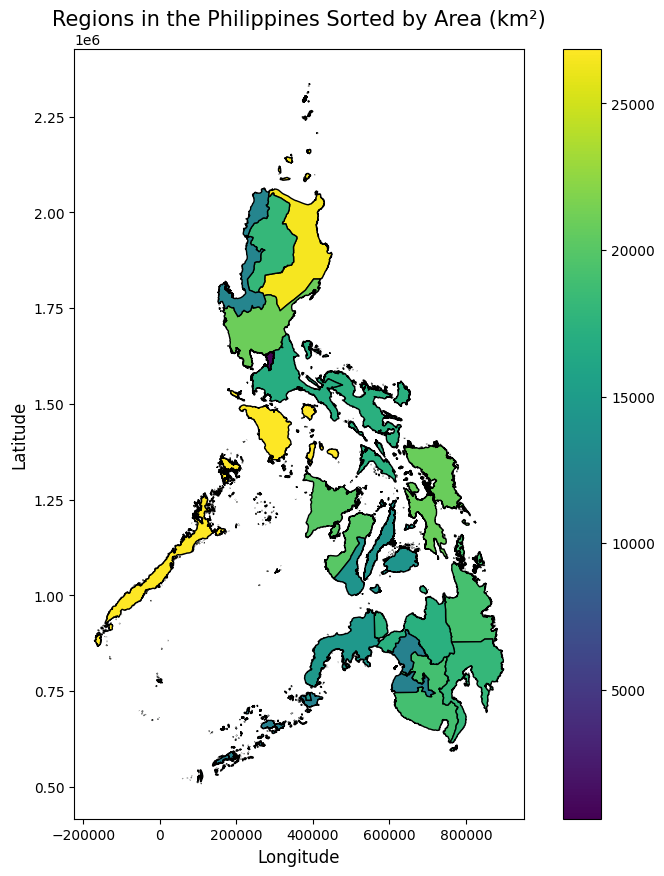

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
data_path = "/content/data/geospatial_learn/Philippines_AL258.kml"
philippines_data = gpd.read_file(data_path)

# Check the current CRS
print("Current CRS:", philippines_data.crs)

# Reproject to a projected CRS (e.g., UTM Zone 51N for the Philippines)
philippines_data = philippines_data.to_crs(epsg=32651)  # UTM Zone 51N

# Calculate the area in square kilometers
philippines_data['area_km2'] = philippines_data['geometry'].area / 1e6  # Convert m² to km²

# Sort the data by area in descending order
sorted_data = philippines_data.sort_values(by='area_km2', ascending=False)

# Display the sorted data
print(sorted_data[['Name', 'area_km2']])

# Visualize the sorted polygons
sorted_data.plot(
    figsize=(10, 10),  # Set the size of the plot
    edgecolor='black',  # Color of polygon borders
    column='area_km2',  # Color based on the area in km²
    legend=True,  # Display a legend
    cmap='viridis'  # Color map for differentiating by area
)

# Add a title and axis labels
plt.title("Regions in the Philippines Sorted by Area (km²)", fontsize=15)
plt.xlabel("Longitude", xfontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Show the map
plt.show()

In [ ]:
import os
print(os.path.exists("../input/geospatial-learn-course-data/DEC_lands/DEC_lands/DEC_lands.shp"))

False


In [ ]:
# Load a GeoDataFrame containing regions in Ghana
regions = gpd.read_file("/content/data/geospatial_learn/ghana/Regions/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

DataSourceError: /content/data/geospatial_learn/ghana/Regions/Map_of_Regions_in_Ghana.shp: No such file or directory